# C-means

### Алгоритм c-means состоит из следующих шагов:

1. Инициализировать матрицу $u=[u_{ij}]$, $U^{(0)}$

2. На k-шаге: вычислить центры векторов $C^{(k)} = [c_j]$ с помощью $U^{(k)}$

$$ c_j = \frac{\sum\limits_{i=1}^{N} u_{ij} x_i}{\sum\limits_{i=1}^{N} u_{ij}} $$

3. Обновить $U^{(k)}$, $U^{(k+1)}$

$$ u_{ij} = \frac{1}{\left(\frac{|| x_i - c_j ||}{\sum\limits_{k=1}^{C}|| x_i - c_k ||}\right)^m}$$

4. Если $|| U^{(k+1)} - U^{(k)} || < \epsilon$ тогда СТОП; в противном случае вернуться к шагу 2.

https://matteucci.faculty.polimi.it/Clustering/tutorial_html/cmeans.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

pygame 2.0.1 (SDL 2.0.14, Python 3.8.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


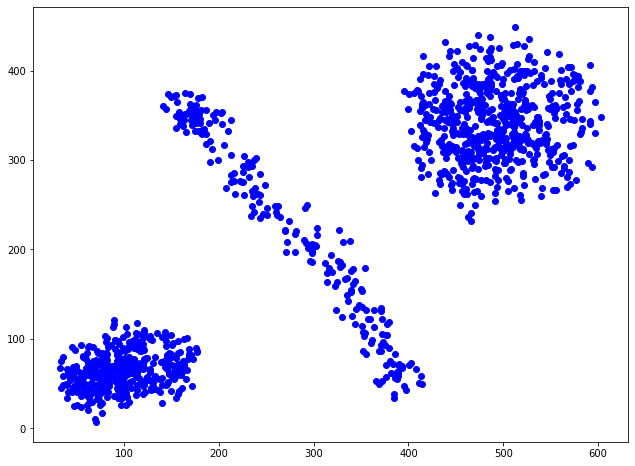

In [2]:
import pygame

points = np.empty((0,2), dtype='f')

c_radius = 2
c_color = (0,0,255)
c_thickness = 0 

bg_color = (255,255,255)
(width,height) = (640,480)
screen = pygame.display.set_mode((width,height))
pygame.display.set_caption("#3")

running = True
pushing = False
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False
            
    if pushing:
        (x, y) = pygame.mouse.get_pos()
        r = np.random.uniform(0, 30)
        t = np.random.uniform(0, 2*np.pi)
        coord = [x+r*np.cos(t), y+r*np.sin(t)]
        global points
        points = np.append(points, [coord], axis=0)
            
    screen.fill(bg_color)
    for point in points:
        pygame.draw.circle(screen,c_color,(int(point[0]),int(point[1])),c_radius,c_thickness)
    pygame.display.flip()
    
pygame.quit()

fig = plt.figure(figsize=(width/60,height/60))
plt.scatter(points[:,0],points[:,1],c="blue")
plt.show()

In [27]:
dataset = points

n_clusters = 3
fuzzy = 2

centroids = dataset[np.random.choice(dataset.shape[0], size=n_clusters, replace=False)] + 1
print(centroids)

def get_dist(list1, list2):
    return np.sqrt(sum((i-j)**2 for i,j in zip(list1,list2)))

dist = np.array([[get_dist(center,data) for center in centroids] \
                 for data in dataset])
#print(dist)

U = (1/dist)**fuzzy
#print(U)

#print(U.sum(axis=1)[:,None])
#print(np.array([U.sum(axis=1)]).T)

print(U/np.array([U.sum(axis=1)]).T)

print((U/np.array([U.sum(axis=1)]).T).sum(axis=0))

[[517.79492597 376.0618744 ]
 [148.19897728  80.88079485]
 [505.02584316 341.59917489]]
[[0.03194482 0.93234025 0.03571493]
 [0.02386227 0.94940599 0.02673173]
 [0.01467033 0.96881736 0.01651231]
 ...
 [0.26770385 0.01089674 0.72139941]
 [0.27850134 0.01638093 0.70511773]
 [0.27024772 0.01501692 0.71473536]]
[307.77496516 547.51754687 431.70748796]


In [ ]:
## ДЗ

class C_Means():
    def __init__(self, dataset, n_clusters=3, fuzzy=2, cut=.9):
        self.dataset = dataset
        self.n_clusters = n_clusters
        self.fuzzy = fuzzy
        self.cut = cut
        self.max_n_iter = 100
        self.tolerance = 1e-2
        self.fitted = False
        self.labels = np.array([], dtype='i')
        self.centroids = self.dataset[np.random.choice(self.dataset.shape[0], size=self.n_clusters, replace=False)] + 1
        self.U = np.array([], dtype='f')
        
    def get_dist(self, list1, list2):
        #
        # Метод для измерения расстояния между двумя объектами
        #
    
    def distribute_data(self):
        #
        # Метод пересчета матрицы принадлежности U
        #
        
    def recalculate_centroids(self):
        #
        # Метод пересчета центров кластеров с помощью матрицы принадлежности
        #
        
    def get_labels(self):
        #
        # Метод заполнения массива меток (labels) обучающей выборки
        #    с использованием параметра отсечения (cut)
        #
            
    def fit(self):
        #
        # Метод обучения модели
        #
        
    def predict(self, list2d):
        #
        # Метод предсказания меток для массива новых объектов
        #